# 4-2.1

# Generate training and testing sets in Google Colab
(I prepare the training and testing sets through Google Colab since I want to save the GPU in kaggle for model training.)

In [ ]:
# Easiest way to download kaggle data in Google Colab: https://www.kaggle.com/discussions/general/74235

# 1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
# 2. Click on Create New API Token - It will download kaggle.json file on your machine
# 3. Go to your Google Colab project file and run the following commands

In [ ]:
# ! pip install -q kaggle
from google.colab import files
files.upload() # need to choose the file you've downloaded from

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"weichunchang2000","key":"773179abc6899133f0e9962470ce127f"}'}

In [ ]:
# make directory named kaggle and copy kaggle.json file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# change the permissions of the file
! chmod 600 ~/.kaggle/kaggle.json

# list the dataset in kaggle
! kaggle datasets list

In [ ]:
# ! kaggle competitions download -c 'name-of-competition', you will find this in each competition
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 811M/814M [00:07<00:00, 155MB/s]
100% 814M/814M [00:07<00:00, 116MB/s]


In [ ]:
! rm -r hw4 # remove the directory if needed to rerun

! mkdir hw4 # then make again
! unzip dogs-vs-cats-redux-kernels-edition.zip -d hw4

rm: cannot remove 'hw4': No such file or directory
Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: hw4/sample_submission.csv  
  inflating: hw4/test.zip            
  inflating: hw4/train.zip           


In [ ]:
! ls hw4

sample_submission.csv  test.zip  train.zip


In [ ]:
# ! rm -r train # remove the directory
# ! rm -r test # remove the directory

! unzip hw4/train.zip -d hw4
! unzip hw4/test.zip -d hw4

In [ ]:
# the first half part of the training set are all cat images
! ls hw4/train |head -n 10

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg


In [ ]:
# the first half part of the training set are all dog images
! ls hw4/train |tail -n 10 # all dogs

dog.9993.jpg
dog.9994.jpg
dog.9995.jpg
dog.9996.jpg
dog.9997.jpg
dog.9998.jpg
dog.9999.jpg
dog.999.jpg
dog.99.jpg
dog.9.jpg


Note that I will have to reshuffle the training set later.

In [ ]:
# testing set won't have 'cat' or 'dog' in file names
! ls hw4/test | head -n 10

10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


In [ ]:
import numpy as np
import pandas as pd
import cv2
import time
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import gc   # Garbage collector for cleaning deleted data from memory

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
train_dogs = [] # initialize in case I need to rerun
train_cats = []

train_dir = 'hw4/train'
test_dir = 'hw4/test'

train_dogs = ['hw4/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] # get dog images
train_cats = ['hw4/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i] # get cat images

test_imgs = ['hw4/test/{}'.format(i) for i in os.listdir(test_dir)] # get test images

train_imgs = train_dogs + train_cats # get the complete training set
random.shuffle(train_imgs) # randomly shuffle s.t. won't encounter continuous cats or dogs to impact model training

# clear list that are useless
del train_dogs
del train_cats
gc.collect() # collect garbage to save memory

4

In [ ]:
# declare image dimensions
# I use color images

img_size = 250
channels = 3  #change to 1 if need to use grayscale image

# define function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    X = [] # an array of resized images
    y = [] # an array of labels

    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (img_size, img_size), interpolation=cv2.INTER_CUBIC))

        # get the labels manually through the file name
        if 'dog' in image:
          y.append(1)
        elif 'cat' in image:
          y.append(0)

    return X, y

In [ ]:
# get the whole training data with labels
X, y = read_and_process_image(train_imgs)

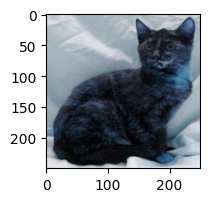

In [ ]:
# randomly check one image to see if successfully reading in images
plt.figure(figsize=(5, 2))
plt.imshow(X[2])

In [ ]:
# convert list to numpy array
X = np.array(X)
y = np.array(y)

# Mount my Google drive to save the processed training arrays and labels
So that I only need to upload the array.npy and label.npy to kaggle to train the model instead of redo data preprocessing everytime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# save to google drive so that don't need to load the image each time
np.save("/content/drive/MyDrive/Colab Notebooks/training_X.npy", X)
np.save("/content/drive/MyDrive/Colab Notebooks/training_y.npy", y)

# Also preprocess the testing set
Note that don't need to deal with labels here since we don't have that in testing set

In [ ]:
# testing set process

img_size = 250
channels = 3  # change to 1 if need to use grayscale image

# define function to read and process the images to an acceptable format for our model
def read_and_process_image_test(list_of_images):
    X = [] # ONLY an array of resized images
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (img_size, img_size), interpolation=cv2.INTER_CUBIC)) # read the image

    return X # no y to return

In [ ]:
X_TEST = read_and_process_image_test(test_imgs)

In [ ]:
# convert list to numpy array
X_TEST = np.array(X_TEST)

In [ ]:
np.save("/content/drive/MyDrive/Colab Notebooks/testing_X.npy", X_TEST)

# I've finished preprocessing images into arrays and save in my Google drive
Let's switch to the kaggle notebook for model training